In [10]:
import numpy as np
import helper_functions as hfunc
import math as m 
import matplotlib.pyplot as plt 
import scipy as sc
from scipy import stats 
import scipy.stats as stat

# Define a Gaussian 
- $\mu_x$ = Expected Value 
> perhaps just the mean or weighted mean.. 
- $\sigma_x$ = Standard Deviaion 
> Q: Do we need the expected result's uncertainty?<br>
Does there exist an uncertainty meausre pre-existing for our value? 
- R.A.M and the Millikan Oil Drop Experiment: 
> Found " 1.592E-19 C " within 1% of current value.<br>
"4.77 $\pm$ .009E-10" Electrostatic Units 


> https://physics.nist.gov/cgi-bin/cuu/Value?e<br>
"1.602 176 634 E-19 C" exact 

- $Var = \sigma_x^2$ = Variance 

- Normal Gaussian: 
> $\mu$ = 0 and $\sigma^2$ = 1 

>> if $\mu$ is not zero then it shifts the gaussian<br>
if $\sigma^2$ is not 1 then it stretches up or down about the expected value 

# Example: find the contant g = 9.8 $\frac{m}{s^2}$

In [11]:
#The value we expect to get 
mu = 9.8
#The Standard Diviation: assumees the known value of g is not exactly gaussian
sigma = 0.2

# Generate random data to use and Plot

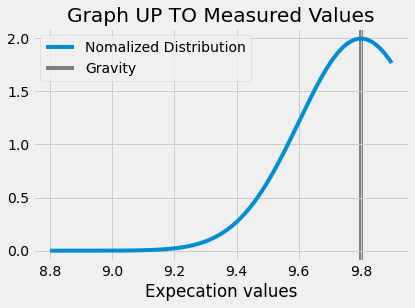

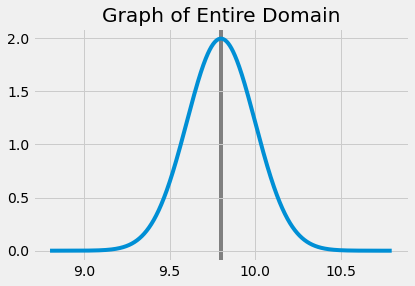

In [12]:
#Range of domain values
#   this assumes we collected/measured data within 5sigma of the expected result
x1 = mu - 5.*sigma 
x2 = mu + 5.*sigma 


#Experimentally derived value 
#   Assume this is the reoccuring value we found -Mode Value
x_measured = 9.9

#set of points for p-value, up to x_measured 
#   Function: np.arange(start,stop,step)

#Stops at the measured value 
x = np.arange(x1, x_measured, 0.001)


#set of all points in domain
#   this gives a more continous result and is used to show full gaussain outline
x_all = np.arange(x1, x2, 0.001)



#Graph using Stats.norm.pdf(data, expextation value, standard div)


#Y Untransformed: Takes the domain values UP TO measured, Expected Value, and SD plots a normal distribution 
y_untransformed = stats.norm.pdf(x, mu, sigma) 


plt.figure(1)
plt.style.use('fivethirtyeight')
plt.plot(x,y_untransformed,label ="Nomalized Distribution")
plt.title("Graph UP TO Measured Values")
plt.xlabel("Expecation values")
plt.axvline(x=mu, color='gray', zorder=0, label= "Gravity")
plt.legend()



#Plots all the values in the domain 
y2_untransformed = stats.norm.pdf(x_all, mu, sigma)


plt.figure(2)
plt.plot(x_all,y2_untransformed)
plt.title("Graph of Entire Domain")
plt.axvline(x=mu, color='gray', zorder=0, label= "Gravity")





# Show the expected values shaded into the graph 

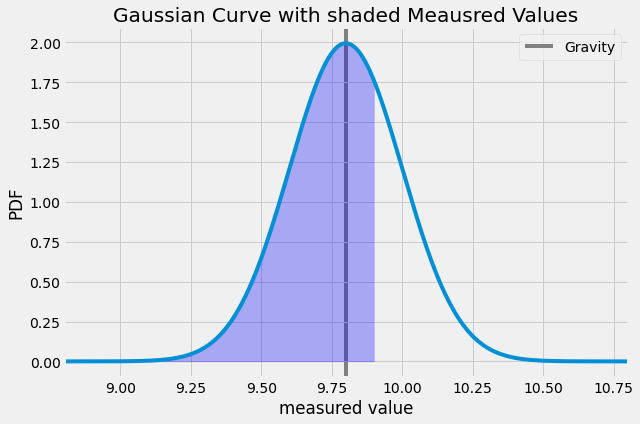

In [13]:
#build plot 

#sizing
fig, ax = plt.subplots(figsize = (9,6))
#style
plt.style.use('fivethirtyeight')


#inputs 
ax.plot(x_all, y2_untransformed)

#fillin - our measured values
#   (x, y_untransformed) corrolates to our measured values
#   (x_all, y2_untransformed) corrolates to an outline as reference 
ax.fill_between(x,y_untransformed, 0, alpha =0.3, color ='b')


#adjust the plot 

#x axis  limits
ax.set_xlim([x1,x2])
#x axis label 
ax.set_xlabel('measured value')
#y axis label
ax.set_ylabel('PDF')
#add line 
plt.axvline(x=mu, color='gray', zorder=0, label= "Gravity")
#legend
ax.legend()
#Title 
ax.set_title("Gaussian Curve with shaded Meausred Values")
#show 
plt.show()

# Calculate the p-value "Probability Value"
- low p-value: greater difference between two observed values and less likely due to random chance 
> we are likely at the tail ends 

# PDF and CDF
- pdf is the derivative of cdf 
- Therefore cdf should give area under curve between a certain range
- evaluated at x is the probability that the random variable X will take a value less thatn or equal to x. This case 10.1 ?
 

In [14]:
#print out the Probability value of the function 
#   Function: stats.norm.cdf(valuem, expected, standard div)


cdf_unnorm = sc.stats.norm.cdf(x_measured, mu, sigma) #takes in the measured value 
print('CDF from the original distribution = ', cdf_unnorm)

CDF from the original distribution =  0.6914624612740125


# 2T-Test 
- with 95% or $z_score$ = 1.96 confidence test can be done with scipy
- Degrees of freedom is `df = sample size - 1`

In [15]:
#extract the following: 
# pr(x1<z<x2) = pr(z<x2)-pr(z<-x1) = pr(z<x2)-(1-pr(z<x1))

if cdf_unnorm > 0.5: 
    pvalue_2t = 2*(1-cdf_unnorm)
else: 
    pvalue_2t = 2*(cdf_unnorm)
print("Two tailed p-value = ",pvalue_2t )
print("This represents our cut-off region,\n zscores in these region reject the null hypothosis.")

Two tailed p-value =  0.6170750774519751
This represents our cut-off region,
 zscores in these region reject the null hypothosis.


# Convert to Z-Score, Gaussian, and Plot
- From z-table: p-value 0.1336 ~ z =-1.11

In [16]:
Zscore = (x_measured -mu)/ sigma 

cdf = sc.stats.norm.cdf(Zscore,0,1)

print('CDF from the normalized distribution= ', cdf)
print(f"Zscore = {Zscore}")



# identically we find the cdf value to match the untransformed graph
print('CDF from the normalized distribution= ', cdf)
print('CDF from the original distribution = ', cdf_unnorm)

CDF from the normalized distribution=  0.6914624612740125
Zscore = 0.4999999999999982
CDF from the normalized distribution=  0.6914624612740125
CDF from the original distribution =  0.6914624612740125


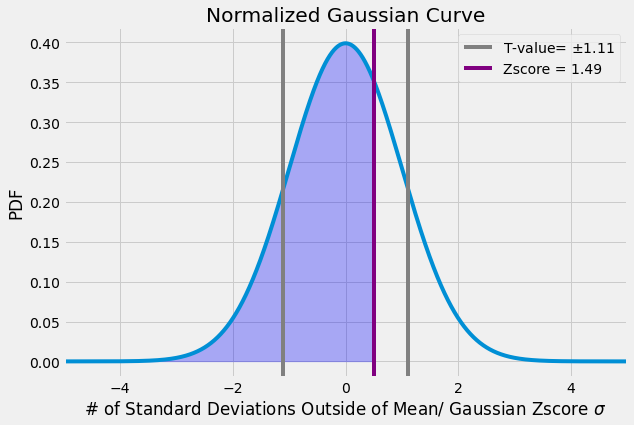

In [17]:
# z transform: shift the mean to zero and make SD= 1 
#   This adjusts the set of values that are used as an outline
z1 = (x1 - mu) / sigma
z2 = (x2 - mu) / sigma

#   This adjusts our - measured value 10.1
z_measured = (x_measured - mu) / sigma 


#define the arrays that contian the z values for the transformed plot
z = np.arange(z1, z_measured, 0.001)
z_all = np.arange(z1, z2, 0.001)

#calculate the arrasy of the corresponding Pdf values 
#mean-mu = 0 and SD-sigma = 1 

#   note: y and y2 are now "transformed" into gaussian curves 

y = stats.norm.pdf(z,0,1)
y2 = stats.norm.pdf(z_all, 0,1)



#integral from z1 to z_measured shaded 

fig, ax = plt.subplots(figsize = (9,6))
ax.plot(z_all, y2)

ax.fill_between (z,y,0, alpha = 0.3, color ='b')
ax.set_xlim([z1,z2])
plt.axvline(x = 1.11, color ='gray', label = 'T-value= $\pm$1.11')
plt.axvline(x = -1.11, color ='gray')
plt.axvline(x = Zscore, color ='purple', label = 'Zscore = 1.49')
ax.set_xlabel('# of Standard Deviations Outside of Mean/ Gaussian Zscore $\sigma$')
ax.set_ylabel('PDF')
ax.set_title('Normalized Gaussian Curve')
plt.legend()

# plt.savefig('Normalized Gaussian Curve Test.pdf')
plt.show()

# Doesn't seem applicaple to our work 
- the x_measured = 10.1 is a set value? we do not have set values 
- we need to find a way to plot from all out droplets the e value and then do the gaussian 
- this graph has two tail values within it's z-score but the goal is the be within 2 sigma? what is wrong with the tail values 
